In [20]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils import matrixConffudion
import seaborn as sns

In [3]:
#telecharger dataset
dataset = pd.read_csv("C:/Users/HP/Desktop/Bate ML/data.csv")
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Exploratory Data Analysis 

<AxesSubplot:xlabel='price_range', ylabel='count'>

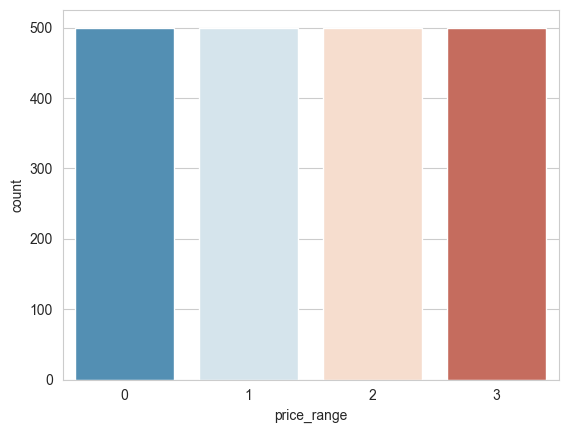

In [21]:
#on doit conteur les nombres de personnes qui sont pas surveicut en bleu et non nombres de personnes qui sont pas surveicut orange sa fait dire que il y a apepré de 300 personne qui sont surveicut et plus de 500 personnes qui sont pas surveicut
sns.set_style("whitegrid")
sns.countplot(x="price_range",data=dataset,palette="RdBu_r")

In [4]:
#Vérification des valeurs manquantes
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
#Pour afficher les differents classe
classes = list(set(dataset['price_range'])) 
print('classes:',classes)

classes: [0, 1, 2, 3]


Splitting data into feature and labels && Lets standardize the data

In [6]:
#pour filter les attributs qui concernant Featuers seulement
x =  dataset.drop(["price_range"],axis=1).values
#pour filter l'attribut qui concerne target => y
y = dataset["price_range"]

In [7]:
#afficher features => X
x

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [8]:
##afficher target => y
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [9]:
scalar = StandardScaler()
scalar.fit(x)

StandardScaler()

In [10]:
standarsized_x = scalar.transform(x)
standarsized_x

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [11]:
x = standarsized_x
y = dataset['price_range']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=42)
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(2000, 20) (1800, 20) (200, 20)
(2000,) (1800,) (200,)


Avec Sklearn => Model

In [13]:
model = KNeighborsClassifier()

In [14]:
#Entrener notre model
model.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
#pour faire la prediction
traning_data_pred_sklearn = model.predict(x_test)
traning_data_pred_sklearn

array([0, 1, 0, 1, 0, 1, 1, 0, 3, 1, 0, 1, 1, 3, 2, 3, 3, 3, 0, 0, 0, 1,
       0, 1, 0, 1, 3, 2, 1, 0, 0, 0, 2, 1, 2, 3, 2, 0, 3, 0, 0, 2, 3, 0,
       2, 0, 1, 2, 3, 0, 1, 0, 1, 0, 0, 2, 3, 1, 0, 0, 1, 2, 2, 2, 0, 1,
       2, 3, 2, 3, 1, 3, 0, 2, 2, 1, 0, 3, 2, 1, 3, 0, 1, 0, 0, 2, 1, 3,
       3, 0, 2, 3, 2, 2, 3, 1, 1, 3, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 2, 2, 2, 3, 2, 0, 2, 0, 1, 3, 1, 3, 1, 0, 2, 1, 2, 2, 0,
       1, 2, 1, 3, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 0,
       3, 3, 0, 1, 1, 1, 0, 2, 3, 1, 2, 0, 0, 2, 3, 2, 2, 1, 1, 1, 2, 0,
       2, 1, 1, 0, 0, 0, 2, 0, 3, 2, 2, 3, 0, 1, 0, 1, 1, 3, 3, 2, 1, 0,
       1, 0], dtype=int64)

#Pour tester notre model en utilisant sklearn  avec nouvelle data

In [16]:
#1021	1	0.5	1	0	1	53	0.7	136	3	6	905	1988	2631	17	3	7	1	1	0
#842	0	2.2	0	1	0	7	0.6	188	2	2	20	756	2549	9	7	19	0	0	1
input_data = (1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0)
input_changed = np.array(input_data).reshape(1,-1)
std_input = scalar.transform(input_changed)
y_pred_sklearn = model.predict(std_input)
print(y_pred_sklearn)

[2]


Evaluer notre model avec sklearn

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,traning_data_pred_sklearn))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        59
           1       0.30      0.35      0.32        49
           2       0.37      0.42      0.39        45
           3       0.69      0.51      0.59        47

    accuracy                           0.48       200
   macro avg       0.50      0.48      0.48       200
weighted avg       0.51      0.48      0.49       200



In [18]:
# La matrix du confdusion
matrixConffudion(y_test,traning_data_pred_sklearn)

Confusion matrix:
 [[37 19  3  0]
 [16 17 13  3]
 [ 3 15 19  8]
 [ 1  5 17 24]]
True Negative (TN): -103
False Positive (FP): [16, 3, 1, 19, 15, 5, 3, 13, 17, 0, 3, 8]
False Negative (FN): [19, 3, 0, 16, 13, 3, 3, 15, 8, 1, 5, 17]
True Positive (TP): [37, 17, 19, 24]


Sauvgarder notre model dans un fichier
=> utilise la bibliothèque joblib pour sauvegarder notre modèle KNN entraîné ainsi qu'un objet 
de mise à l'échelle standard (standard scalar) utilisé pour normaliser les données.
voici une explication du code

In [19]:
#Tout d'abord, la bibliothèque joblib est importée.
import joblib

"""
enregistre le modèle KNN entraîné dans un fichier nommé "model.pkl", et que le modèle est
enregistré sous forme binaire dans le fichier.
"""
joblib.dump(model,'model.pkl')


""" 
enregistre l'objet de mise à l'échelle standard (standard scalar) dans un fichier
nommé "scalar.pkl". L'objet de mise à l'échelle standard est utilisé pour normaliser les données
d'entrée avant de les utiliser pour faire des prédictions avec le modèle. En le sauvegardant, 
on peut le charger ultérieurement et l'appliquer aux nouvelles données de la même manière que 
lors de l'entraînement.
"""
joblib.dump(scalar,'scalar.pkl')

"""
joblib.dump j'ai le utiliser pou sauvegarder le modèle et l'objet de mise à l'échelle standard
dans des fichiers distincts.
"""

""" 
Pour charger le modèle et l'objet de mise à l'échelle à partir des fichiers sauvegardés, 
on utilise les fonctions joblib.load('model.pkl') et joblib.load('scalar.pkl') respectivement.
"""

" \nPour charger le modèle et l'objet de mise à l'échelle à partir des fichiers sauvegardés, \non utilise les fonctions joblib.load('model.pkl') et joblib.load('scalar.pkl') respectivement.\n"